In [1]:
# Importing necessary libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import add_dummy_feature
from sklearn.linear_model import LogisticRegression

##### Data Information
- This is the classic marketing bank dataset uploaded originally in the UCI Machine Learning Repository.
- Its having 17 columns which includes information about a client of bank in the Last Marketing Campaign.
- As the target it is given that the client subscribed a term deposit or not.

#### Problem Statement:- 
- We have to analyze the last marketing campaign the bank performed and identify the patterns that will help us find conclusions in order to develop future strategies.
- Also after seeing client information try to predict that they subscribed a term deposit.
- Find the best strategies to improve for the next marketing campaign. 

In [3]:
data = pd.read_csv("bank.csv")
data.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [4]:
data.info() , data.describe() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


(None,
                 age       balance           day      duration      campaign  \
 count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
 mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
 std       11.913369   3225.413326      8.420740    347.128386      2.722077   
 min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
 25%       32.000000    122.000000      8.000000    138.000000      1.000000   
 50%       39.000000    550.000000     15.000000    255.000000      2.000000   
 75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
 max       95.000000  81204.000000     31.000000   3881.000000     63.000000   
 
               pdays      previous  
 count  11162.000000  11162.000000  
 mean      51.330407      0.832557  
 std      108.758282      2.292007  
 min       -1.000000      0.000000  
 25%       -1.000000      0.000000  
 50%       -1.000000      0.000000  
 75%       2

So there is 7 Integer columns and 9 catagorical columns.

# Data Description
### Cilent Information
1. **Age** :-) In numbers (Abslute Intergers)
2. **Job** :-) Its have there type of profession like  management,services etc.
3. **Marital** :-) 
4. **Education** :-)
5. **Default** :-)
6. **Balance** :-)
7. **Housing** :-)
8. **Loan** :-)

### Last contact Information
9. **Contact** :-)
10. **Day** :-) last contact day of the week
11. **Month** :-)
12. **Duration** :-)

### Intractions with bank

13. **Campaign** :-)
14. **Pdays** :-)  
15. **Previous** :-)
16. **Poutcome** :-)

### Output 
17. **Deposit** :-)


# Exploratory Data Anlysis

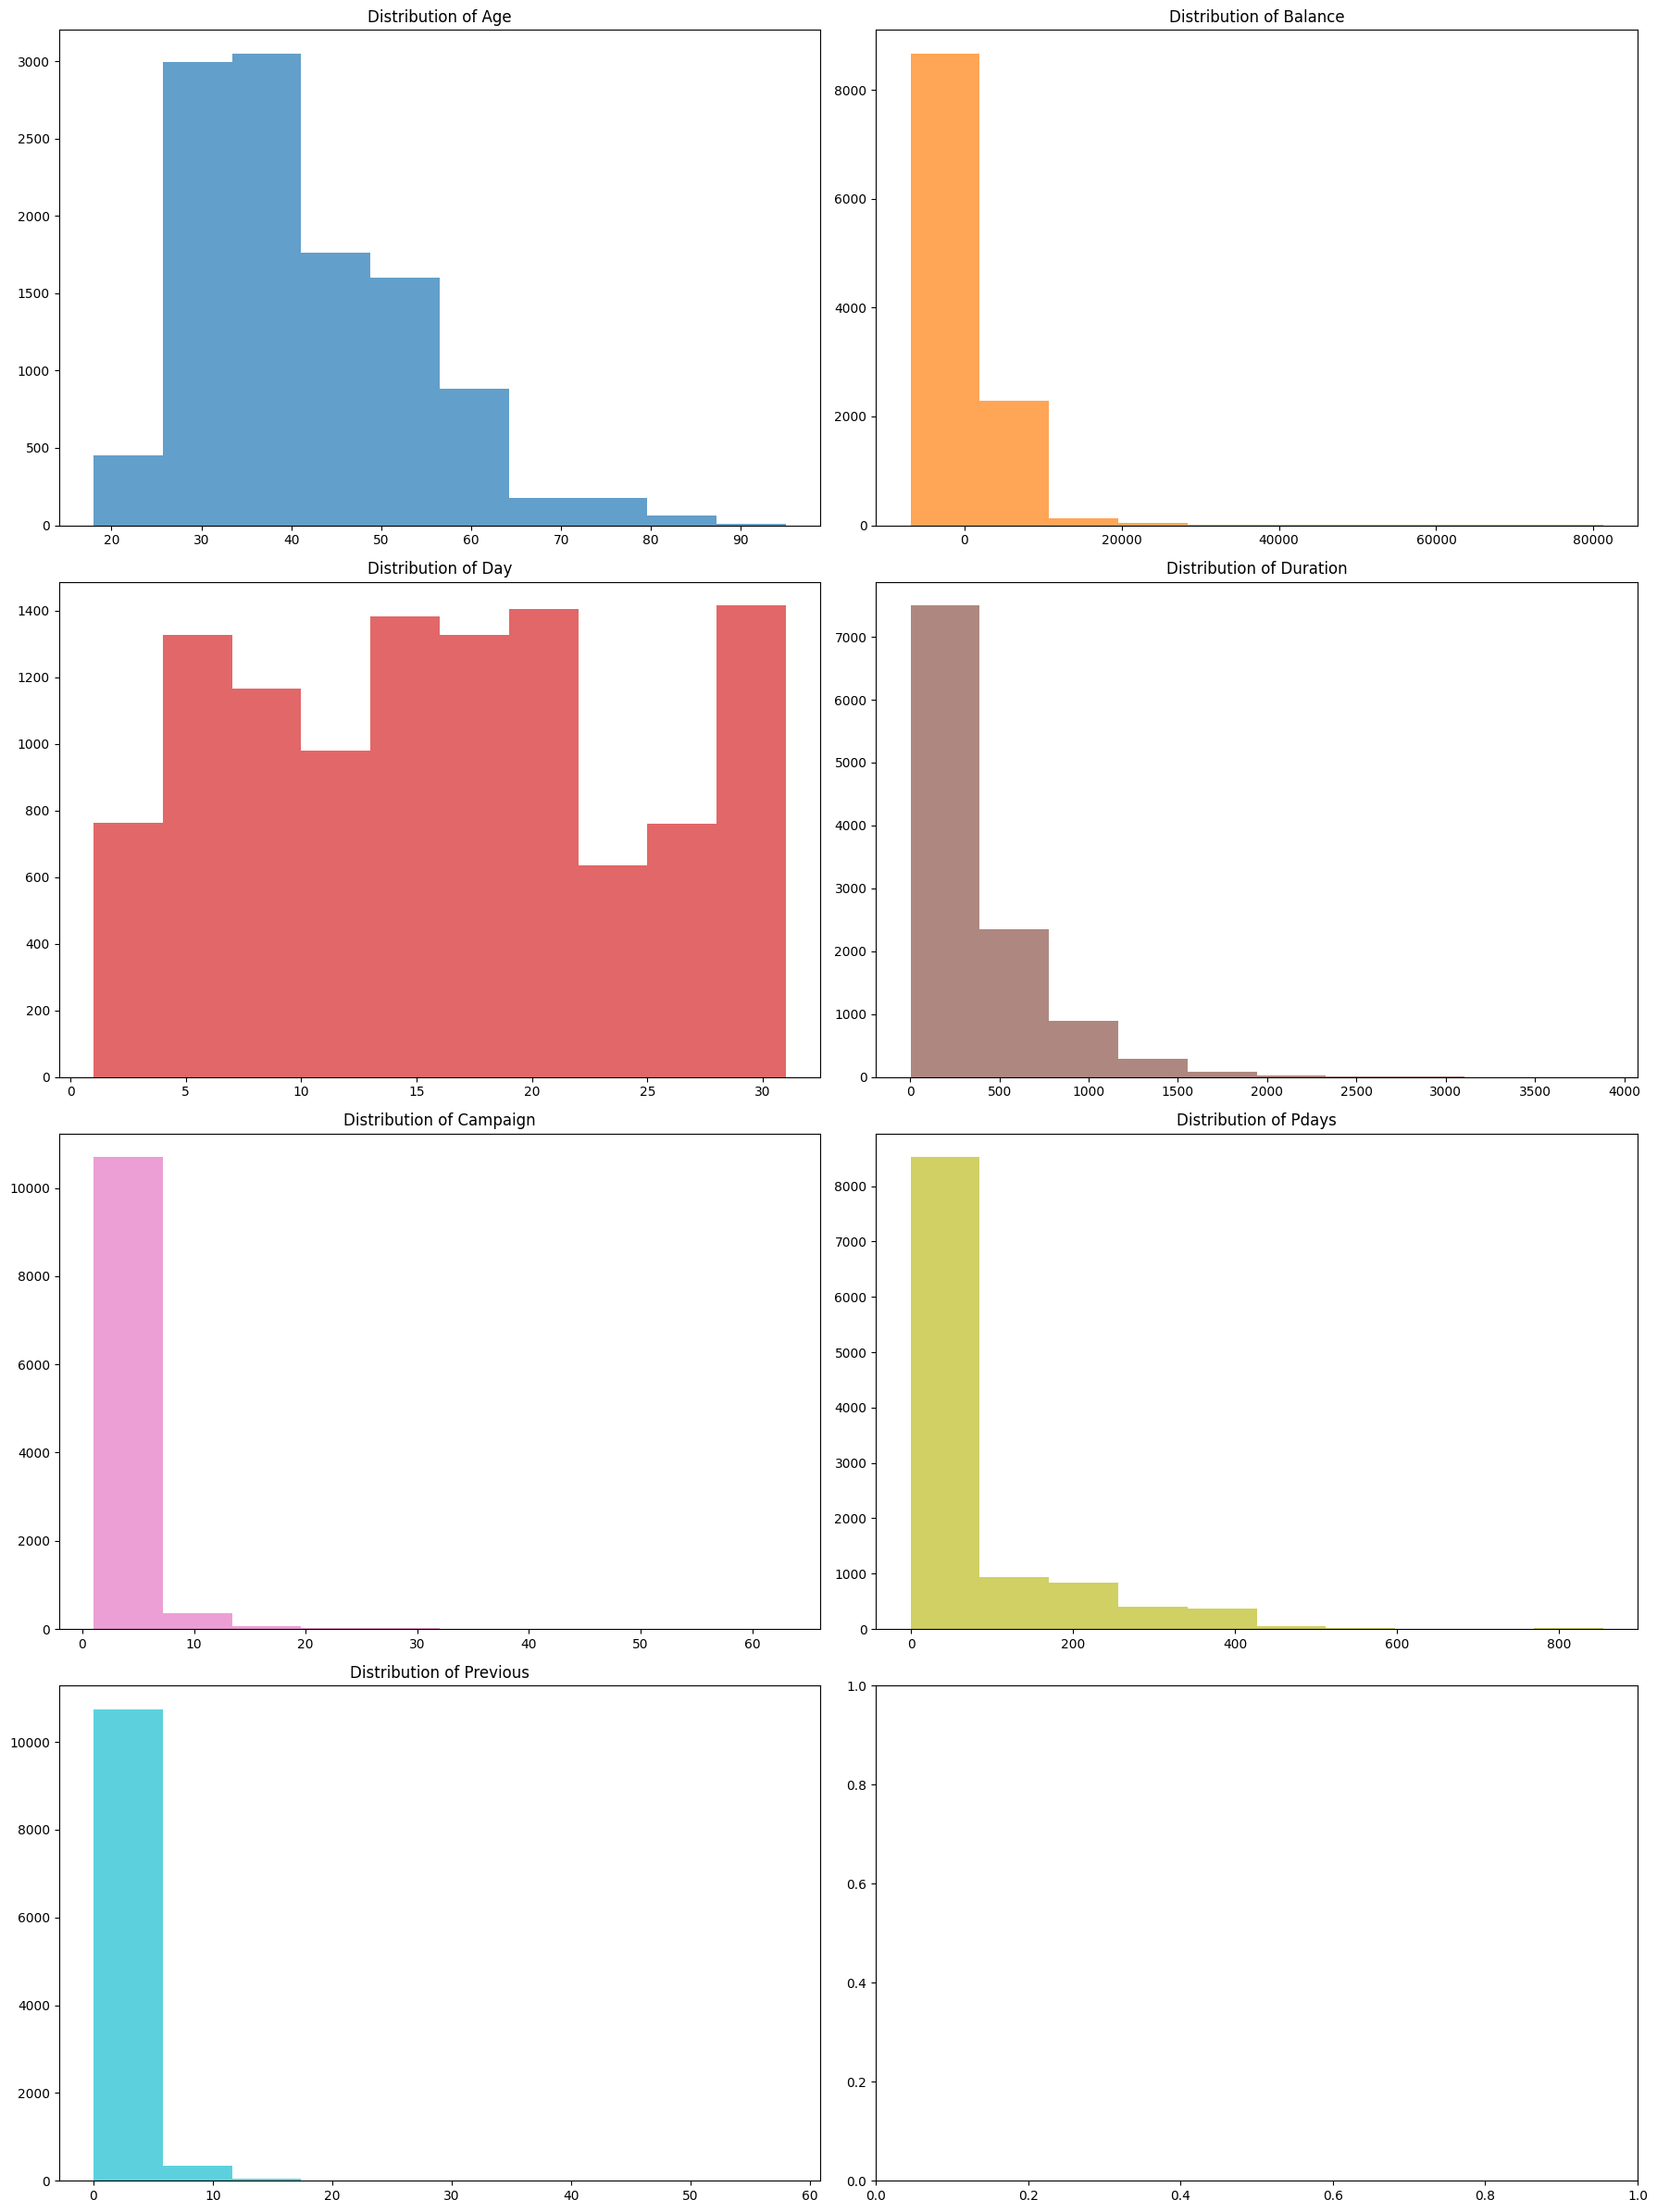

In [5]:
numerical_columns = data.select_dtypes(include=['int', 'float']).columns
colors = plt.cm.tab10(np.linspace(0, 1, len(numerical_columns)))

num_plots_per_row = 2
num_rows = (len(numerical_columns) + num_plots_per_row - 1) // num_plots_per_row
fig, axes = plt.subplots(nrows=num_rows, ncols=num_plots_per_row, figsize=(18, 6*num_rows))

for i, (column, color) in enumerate(zip(numerical_columns, colors)):
    row_index = i // num_plots_per_row
    col_index = i % num_plots_per_row

    axes[row_index, col_index].hist(data[column], color=color, alpha=0.7)
    axes[row_index, col_index].set_title(f'Distribution of {column.capitalize()}')
    axes[row_index, col_index].grid

plt.tight_layout()
plt.show()


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')


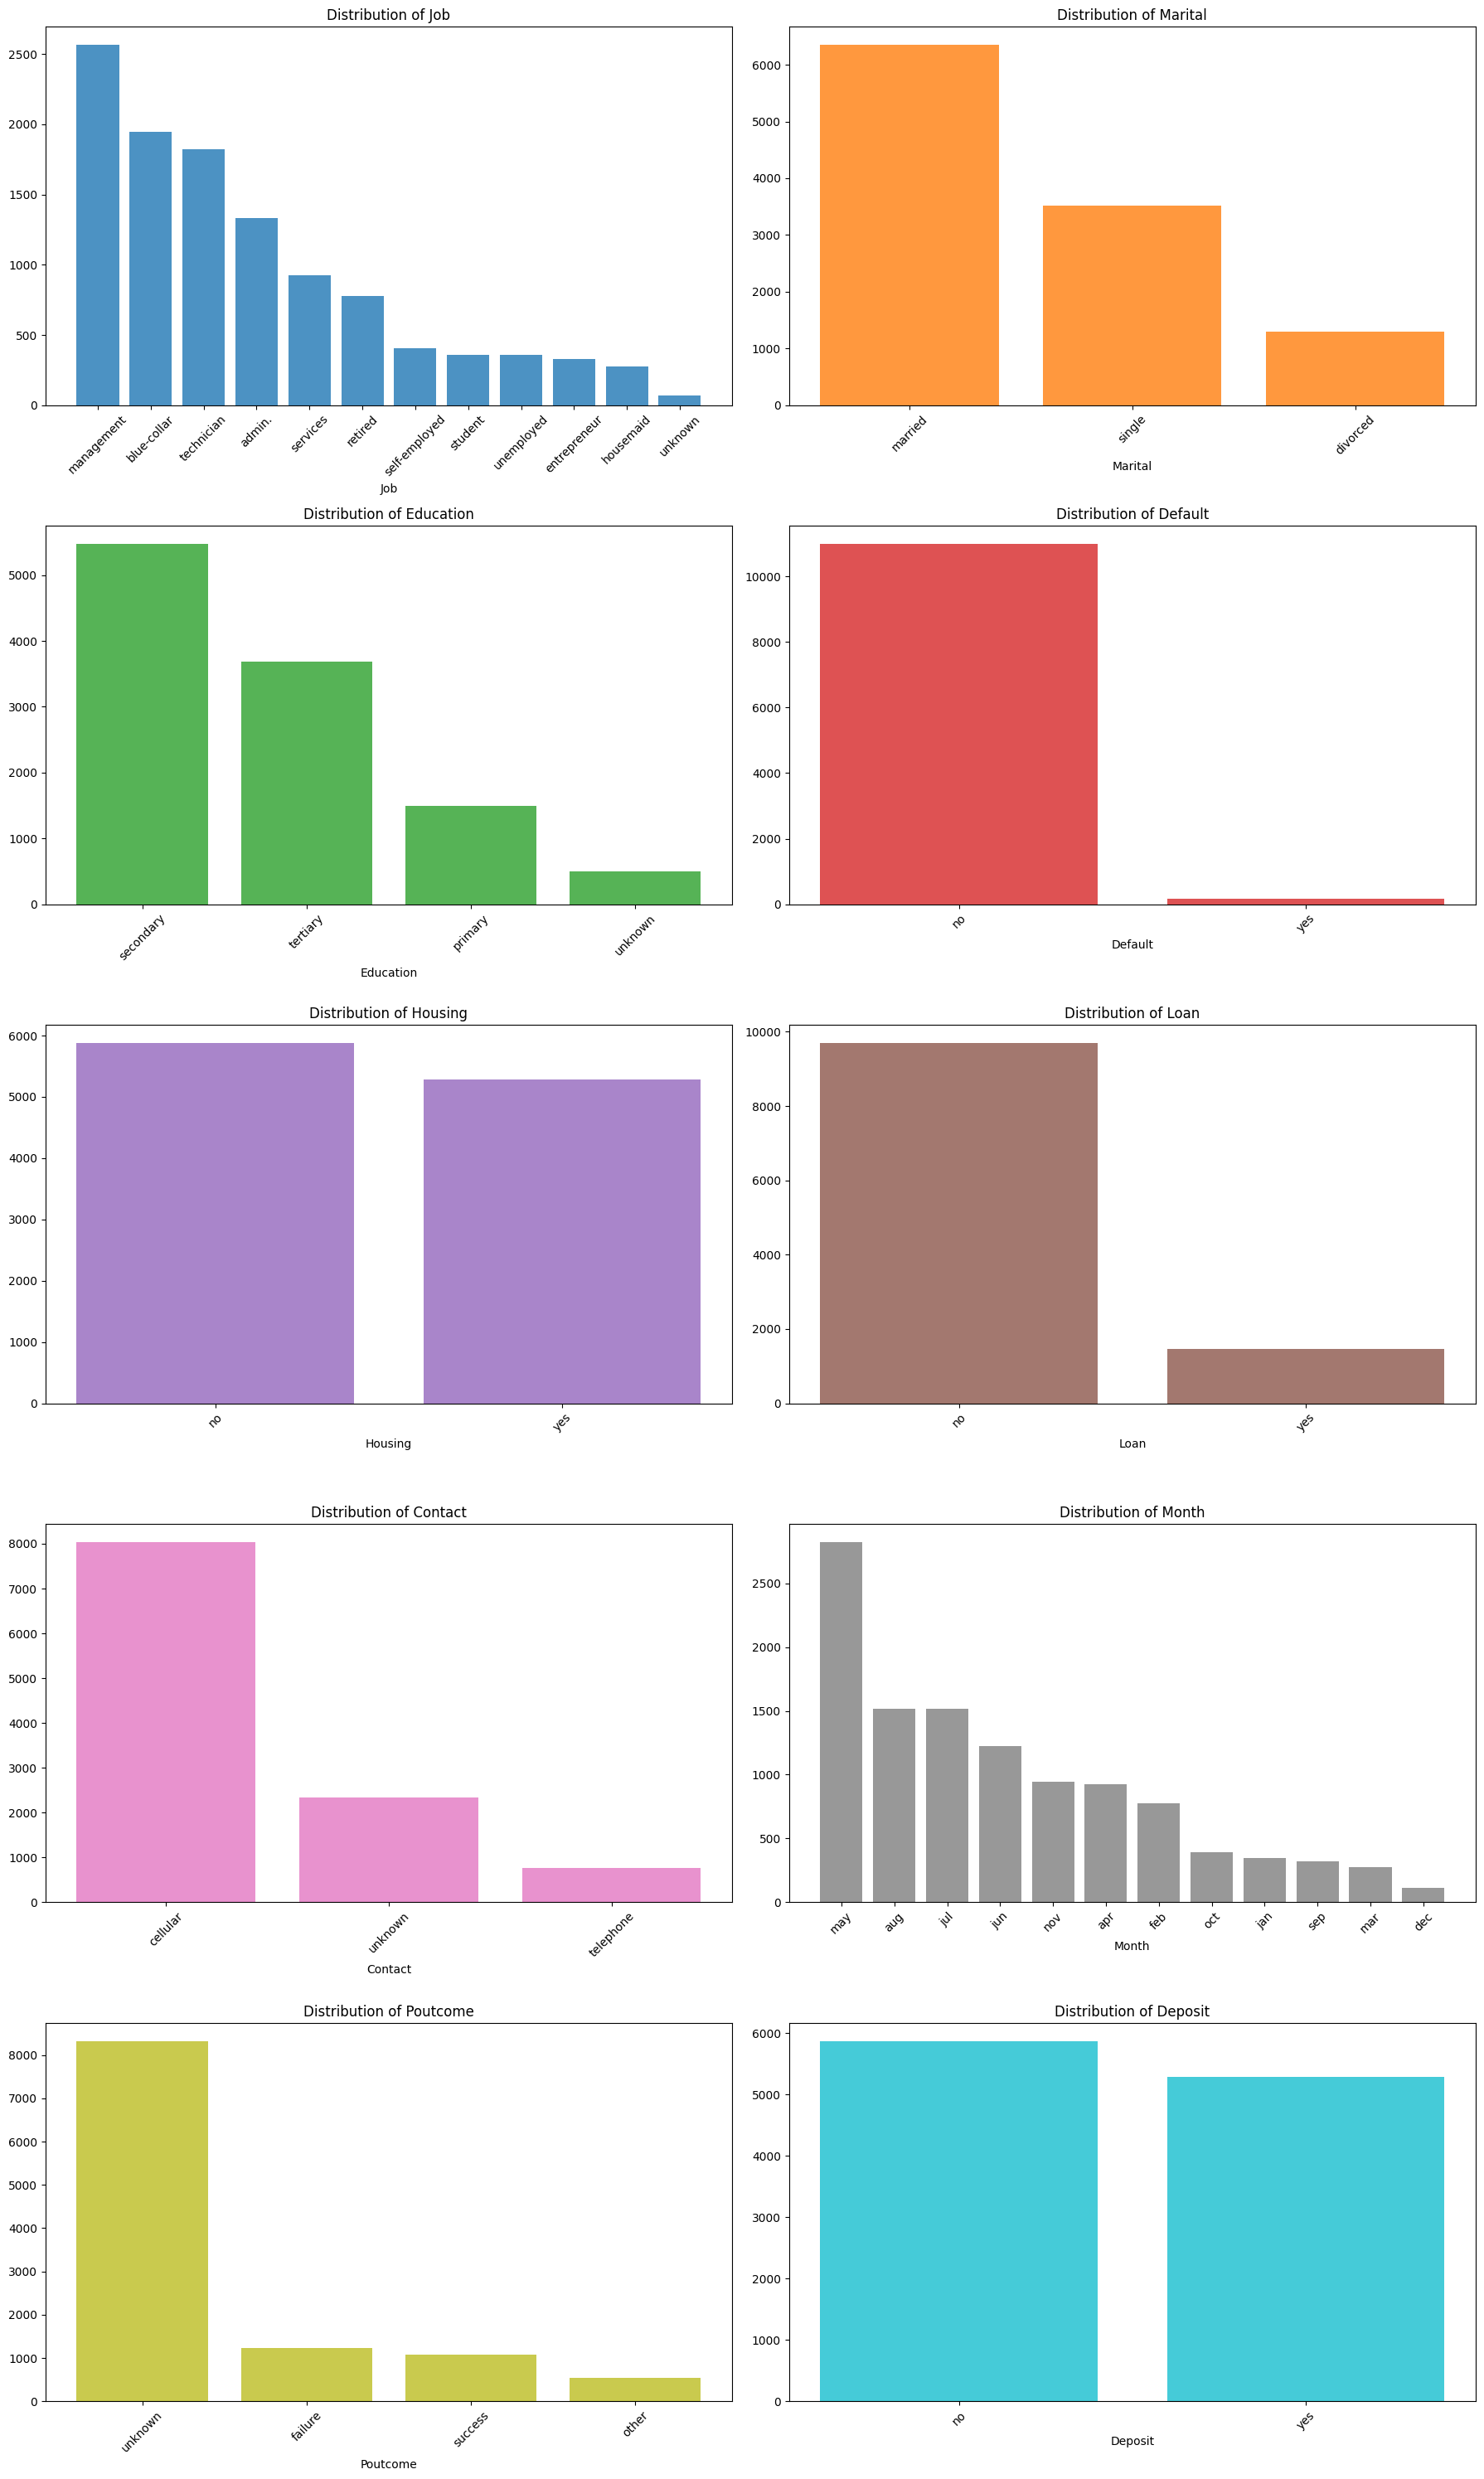

In [6]:

categorical_columns = data.select_dtypes(include=['object']).columns
print(categorical_columns)
colors = plt.cm.tab10(np.linspace(0, 1, len(categorical_columns)))

num_plots_per_row = 2
num_rows = (len(categorical_columns) + num_plots_per_row - 1) // num_plots_per_row
fig, axes = plt.subplots(nrows=num_rows, ncols=num_plots_per_row, figsize=(18, 6*num_rows))

for i, (column, color) in enumerate(zip(categorical_columns, colors)):
    row_index = i // num_plots_per_row
    col_index = i % num_plots_per_row

    axes[row_index, col_index].bar(data[column].value_counts().index, data[column].value_counts(), color=color, alpha=0.8)
    axes[row_index, col_index].set_xlabel(column.capitalize())
    axes[row_index, col_index].set_title(f'Distribution of {column.capitalize()}')
    axes[row_index, col_index].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


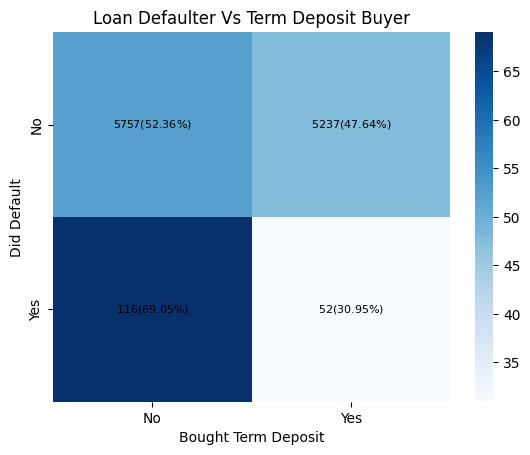

In [7]:
cm = confusion_matrix(data["default"], data["deposit"])
sums = np.sum(cm, axis=1, keepdims=True)
percentages = cm / sums.astype(float) * 100
fig, ax = plt.subplots()
sns.heatmap(percentages, annot=False, fmt='.2f', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], ax=ax)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j + 0.5, i + 0.5, rf'{cm[i, j]}$({percentages[i, j]:.2f}\%)$', ha='center', va='center', fontsize=8, color='black')

plt.title('Loan Defaulter Vs Term Deposit Buyer')
plt.xlabel('Bought Term Deposit')
plt.ylabel('Did Default')
plt.show()


In [8]:
data["deposit"].value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

In [9]:
data["default"].value_counts()

default
no     10994
yes      168
Name: count, dtype: int64

<Figure size 2000x500 with 0 Axes>

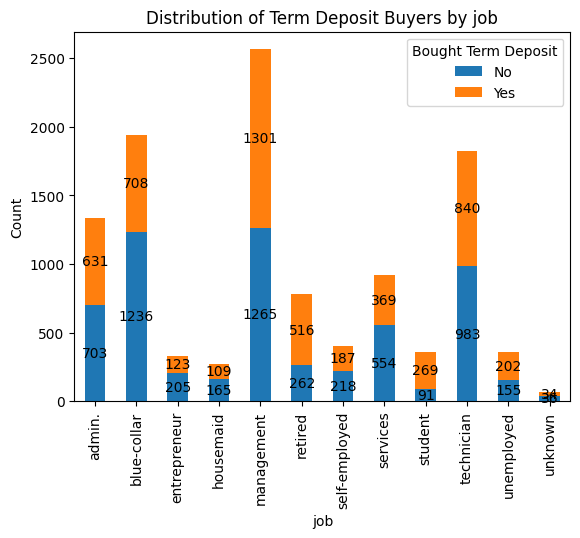

<Figure size 2000x500 with 0 Axes>

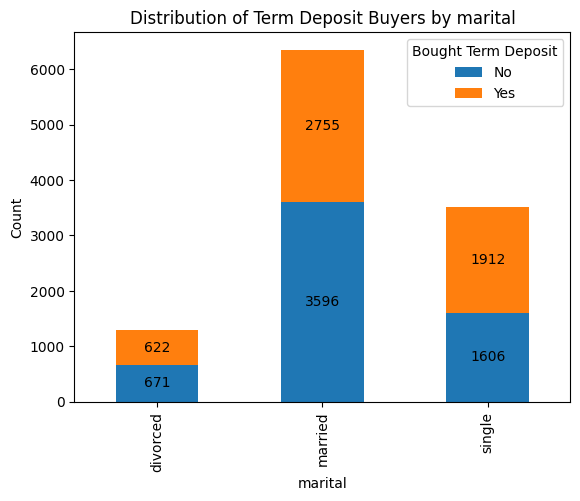

<Figure size 2000x500 with 0 Axes>

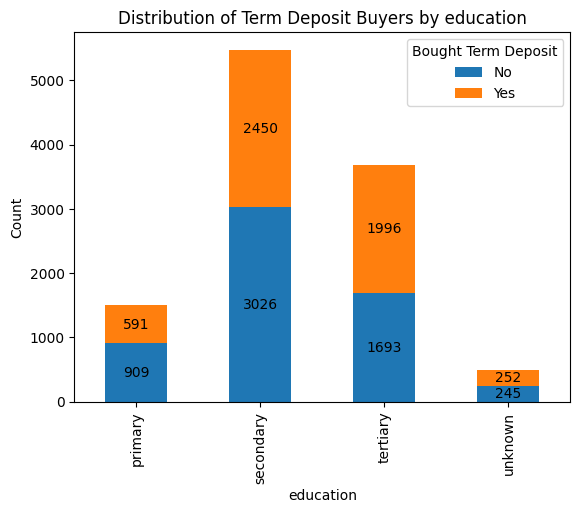

<Figure size 2000x500 with 0 Axes>

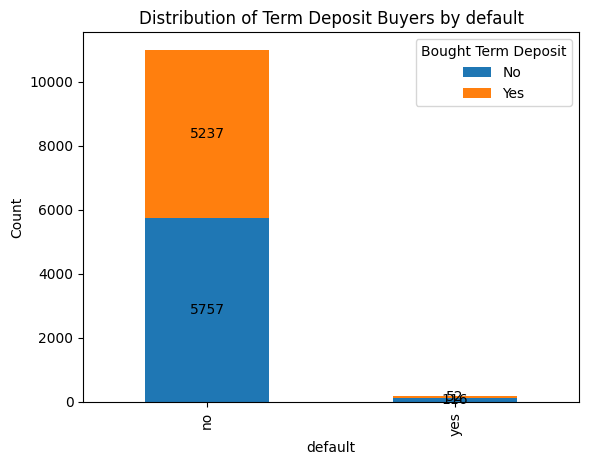

<Figure size 2000x500 with 0 Axes>

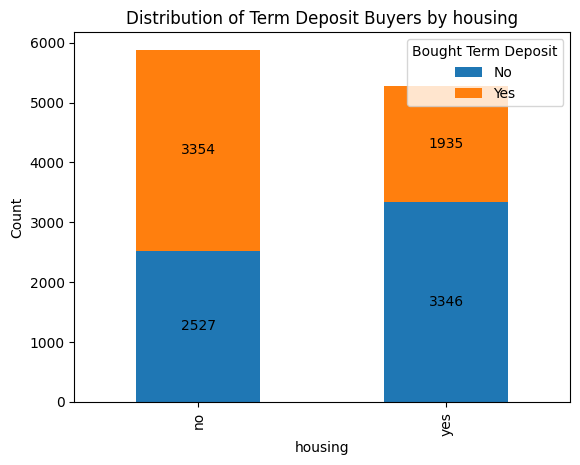

<Figure size 2000x500 with 0 Axes>

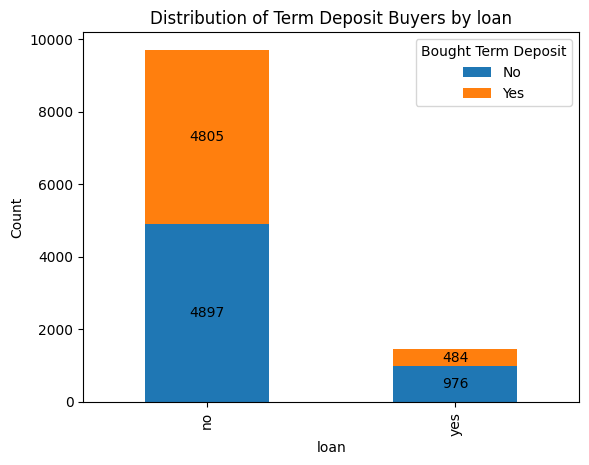

<Figure size 2000x500 with 0 Axes>

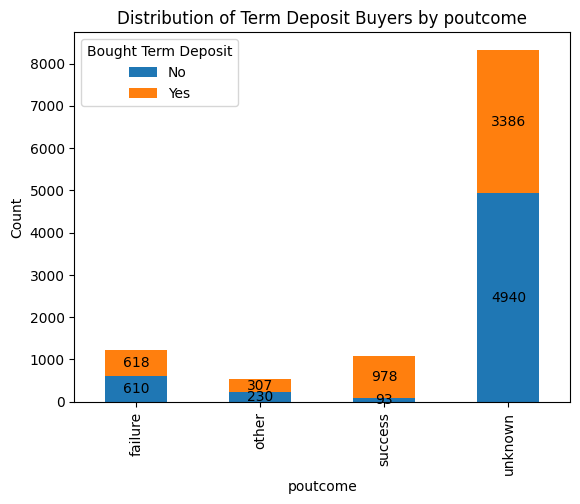

In [10]:
attributes_to_compare = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']

for attribute in attributes_to_compare:
    plt.figure(figsize=(20, 5))
    total_counts = data[attribute].value_counts()

    counts = data.groupby([attribute, 'deposit']).size().unstack('deposit')
    #print(counts)
    ax = counts.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        count = f'{height:.0f}'
        annotation_text = f'{count}'
        ax.annotate(annotation_text, (x + width / 2, y + height / 2), ha='center', va='center')

    plt.title(f'Distribution of Term Deposit Buyers by {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Count')
    plt.legend(title='Bought Term Deposit', labels=['No', 'Yes'])
    plt.show()


This is clean data so nothing for data cleaning but we can remove some unnecessay colums like 


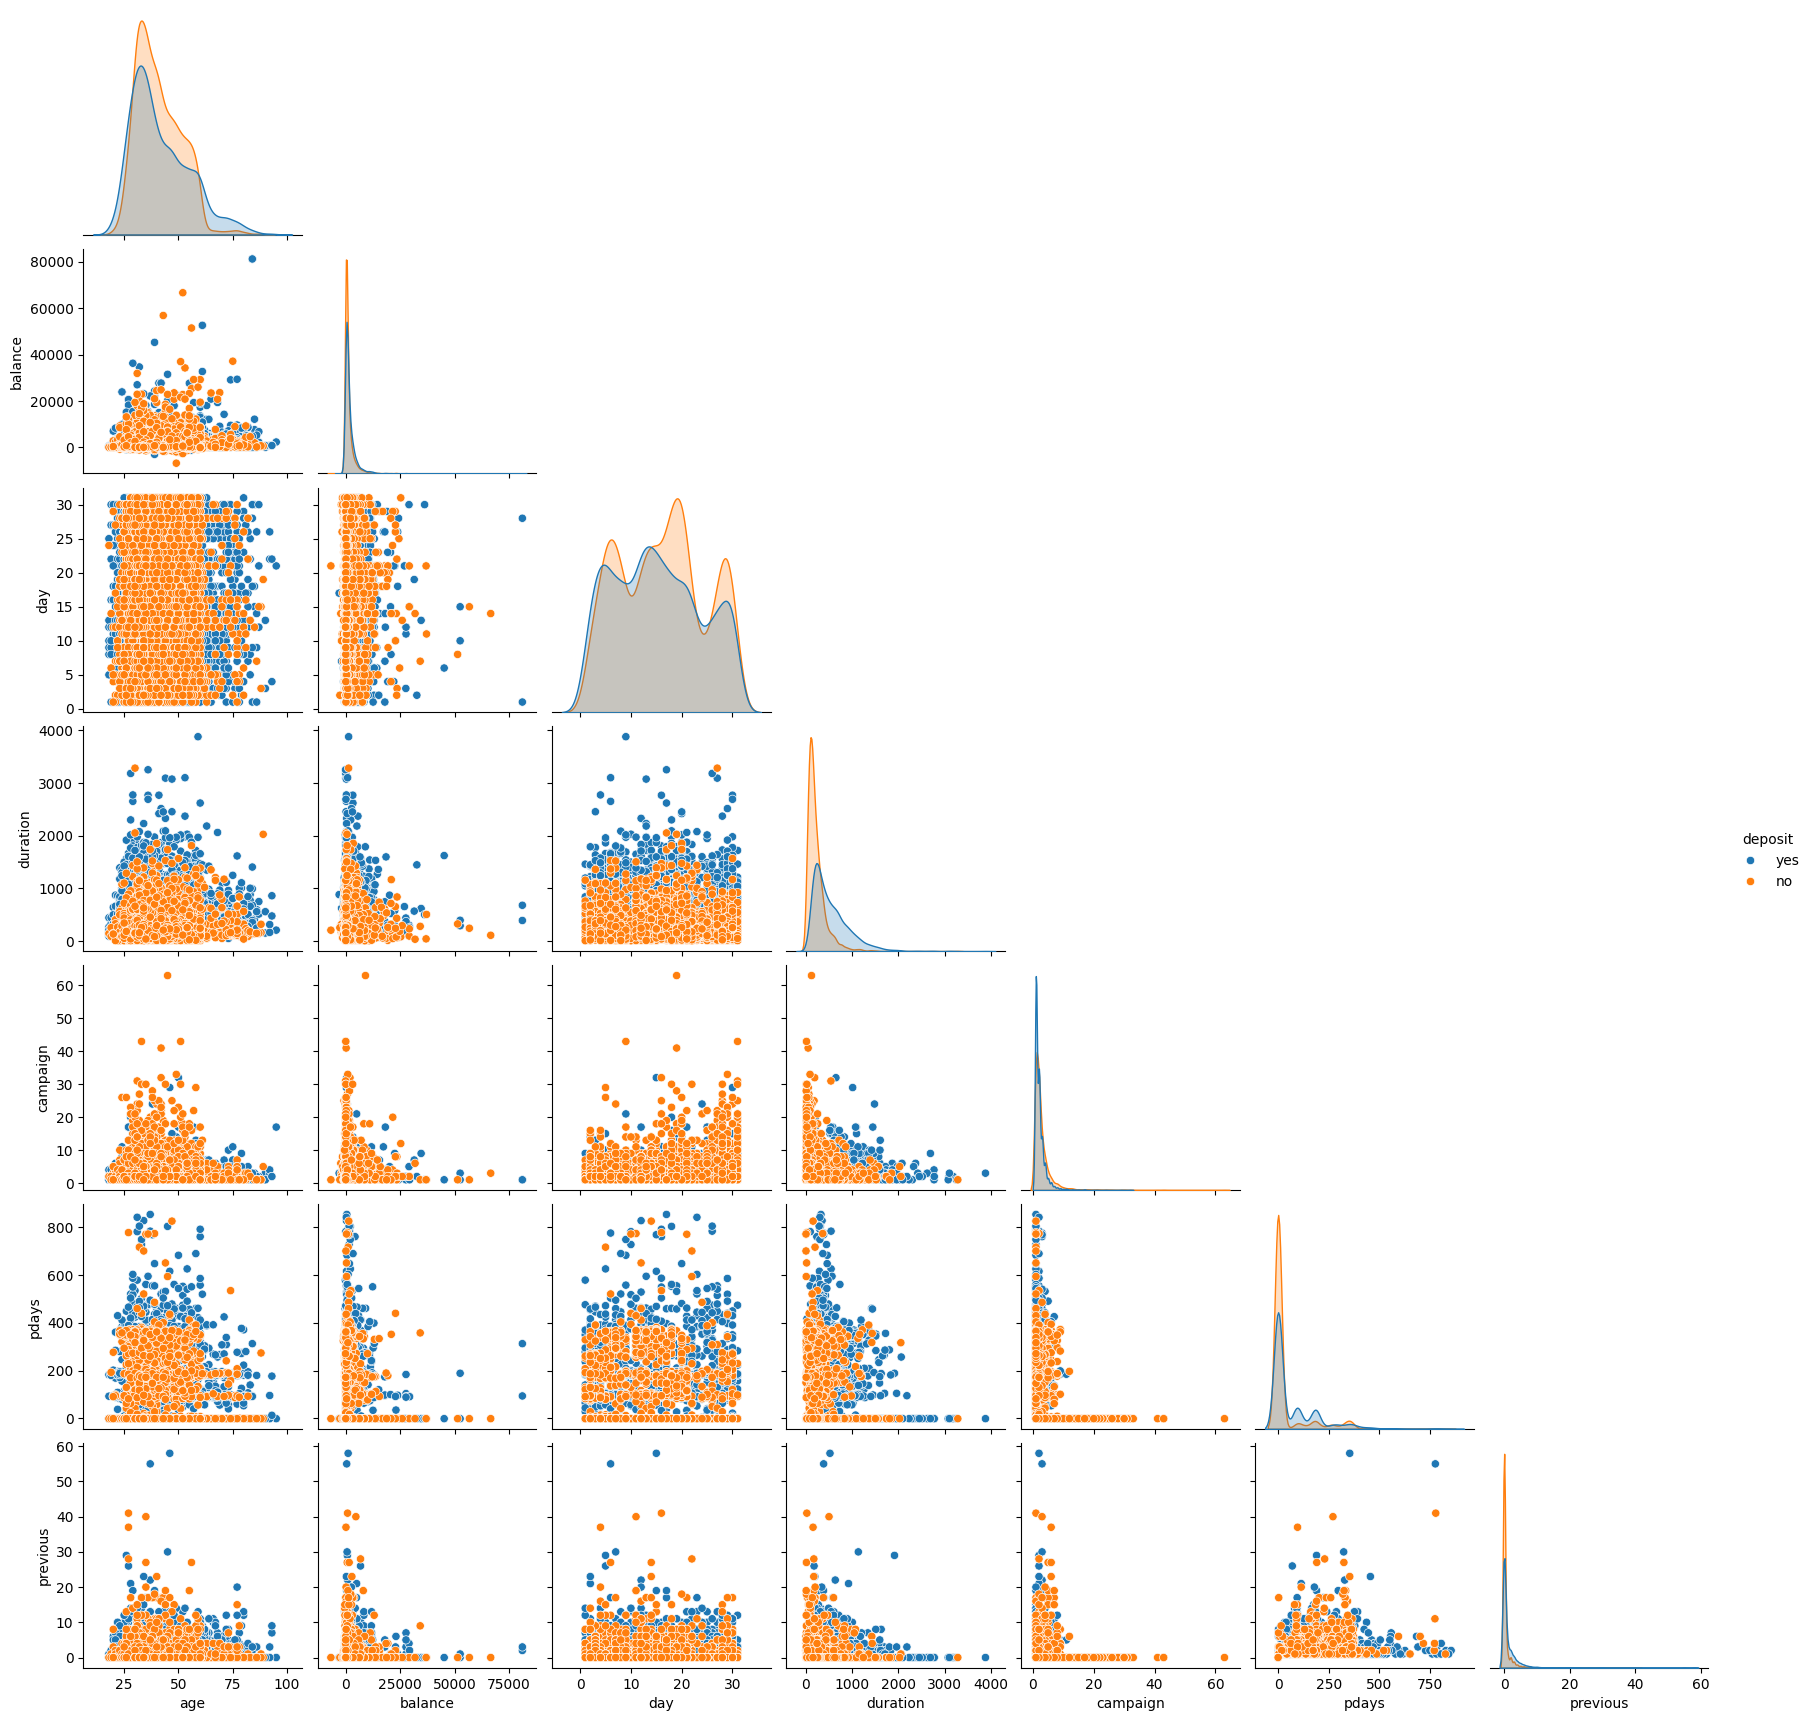

In [11]:
sns.pairplot(data,hue='deposit',corner=True)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'age'),
  Text(0, 1.5, 'balance'),
  Text(0, 2.5, 'day'),
  Text(0, 3.5, 'duration'),
  Text(0, 4.5, 'campaign'),
  Text(0, 5.5, 'pdays'),
  Text(0, 6.5, 'previous')])

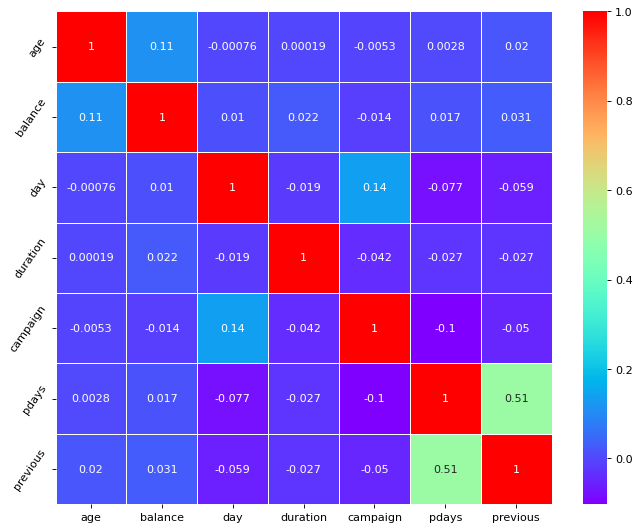

In [12]:
num_columns = data.select_dtypes(include='int64').columns.tolist()
num_data = data.loc[:, num_columns].copy()
plt.figure(figsize=(10,8),dpi=80)
sns.heatmap(num_data.corr(),cmap="rainbow",annot=True,linewidth=0.5,)
plt.yticks(rotation=55)

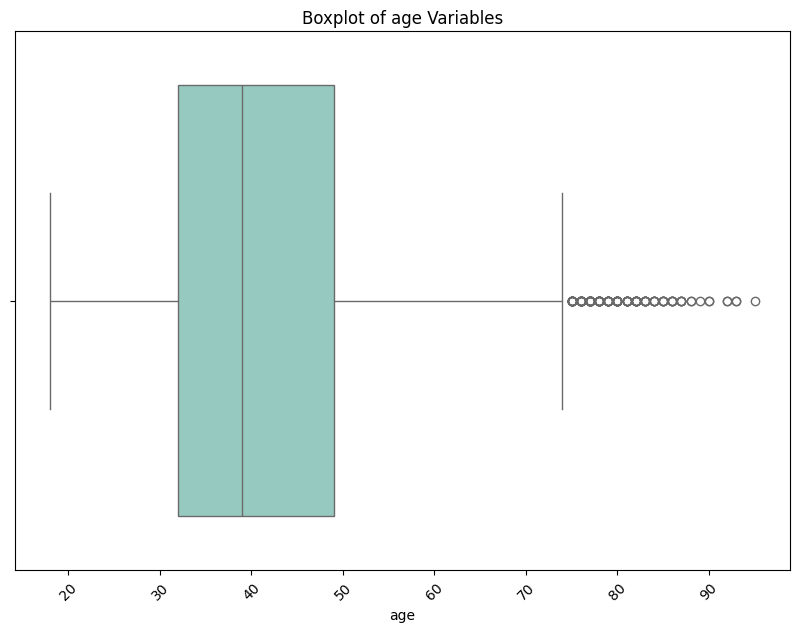

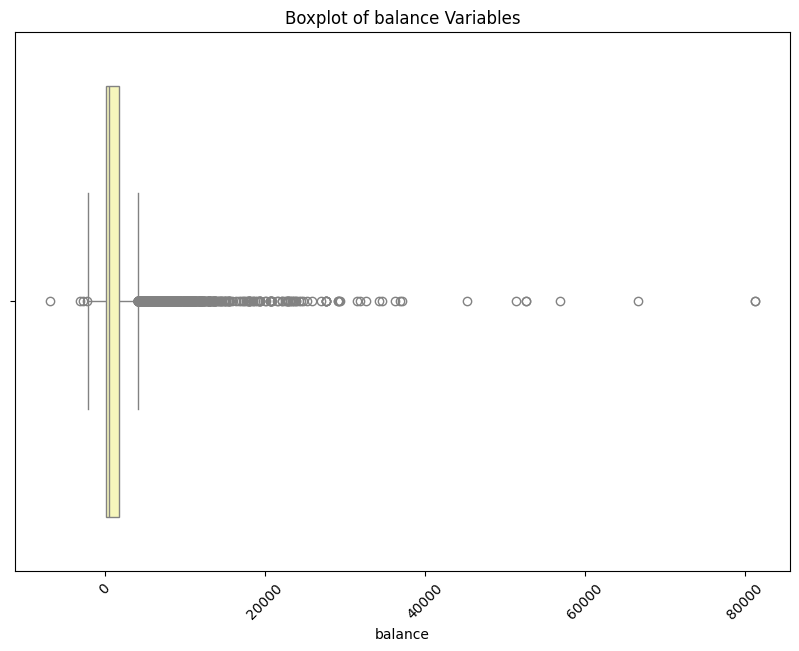

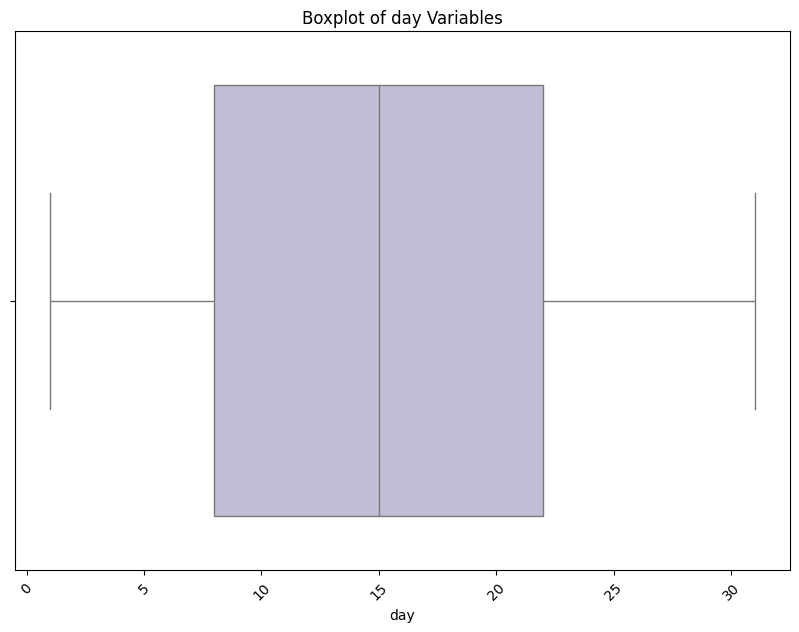

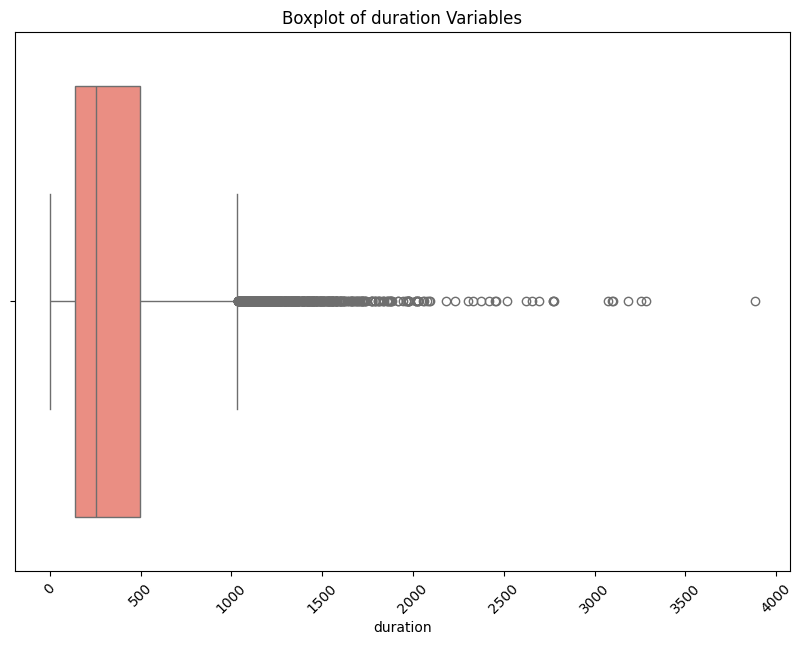

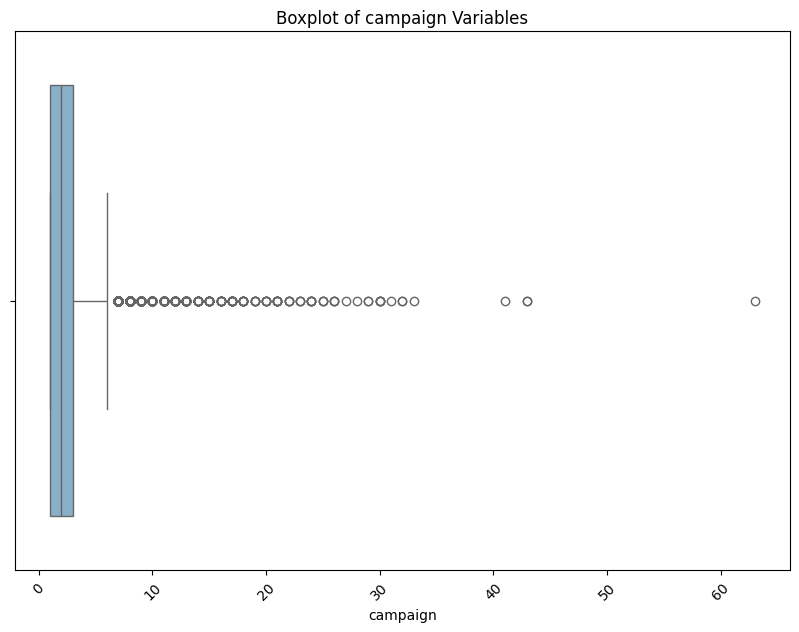

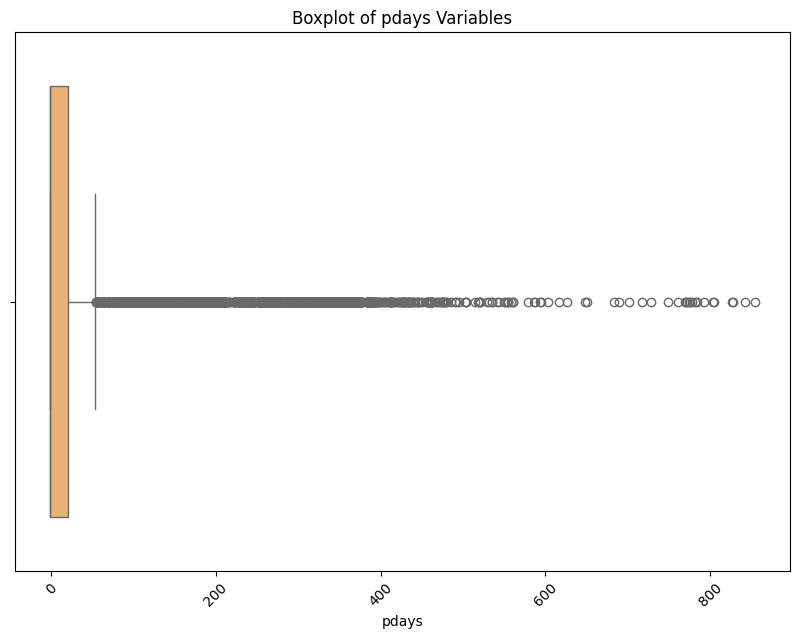

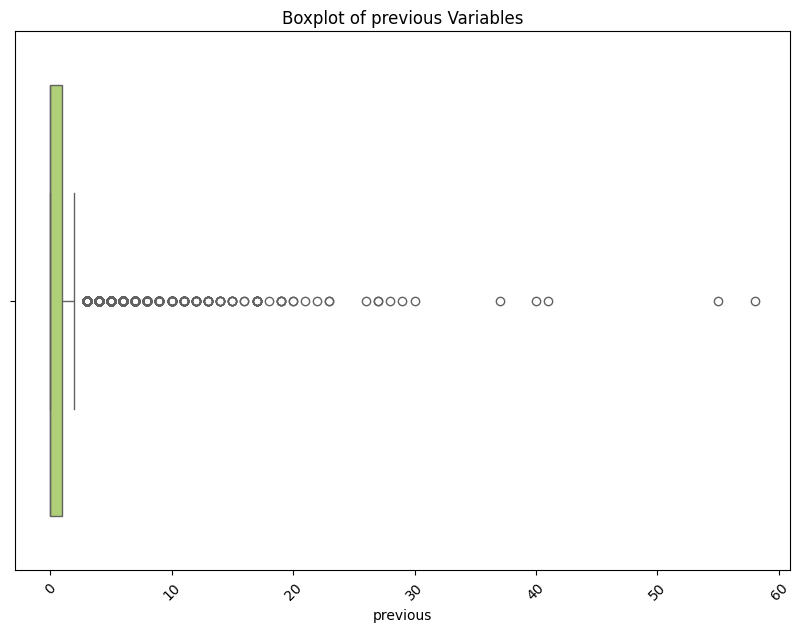

In [13]:

for i, column in enumerate(numerical_columns):
    plt.figure(figsize=(10,7))
    sns.boxplot(x=data[column], color=sns.color_palette("Set3")[i])
    plt.title(f'Boxplot of {column} Variables')
    plt.xticks(rotation=45) 
    plt.show()


# Model building

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
encoder = OneHotEncoder(sparse=False)
#print(len(categorical_columns))
categorical_columns = categorical_columns[:9]
My_predictors = pd.DataFrame(encoder.fit_transform(data[categorical_columns]))
# encoded_data = pd.DataFrame(encoder.fit_transform(data[categorical_columns]))

# Retrieve the column names after encoding
encoded_columns = encoder.get_feature_names_out(categorical_columns)
#print(encoded_columns)
My_predictors = pd.concat([My_predictors, data[numerical_columns]], axis=1)
Target = pd.DataFrame(np.where(data['deposit'] == 'yes', 1, 0))


c:\Users\mahes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [16]:
My_predictors.columns = My_predictors.columns.astype(str)
X_train , y_train , X_test , y_test = train_test_split(My_predictors,Target)

In [17]:
model_1 = DecisionTreeClassifier(max_depth=5)
model_1.fit(X_train,X_test)

DecisionTreeClassifier(max_depth=5)

In [18]:
model_1.score(X_train,X_test) , model_1.score(y_train,y_test)

(0.8140007167602437, 0.8004299534217126)

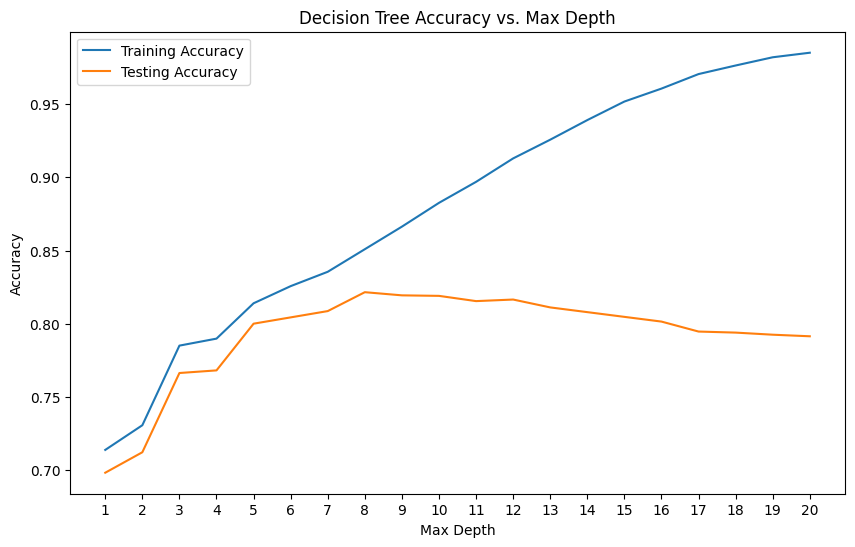

In [19]:
from sklearn.metrics import accuracy_score
max_depths = np.arange(1, 21)

# Initialize lists to store performance metrics
train_scores = []
val_scores = []

# Iterate over max depths
for max_depth in max_depths:
    # Initialize and fit decision tree classifier
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model.fit(X_train, X_test)

    train_accuracy = model.score(X_train, X_test)
    val_accuracy = model.score(y_train, y_test)
    
    # Append scores to lists
    train_scores.append(train_accuracy)
    val_scores.append(val_accuracy)
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_scores, label='Training Accuracy')
plt.plot(max_depths, val_scores, label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. Max Depth')
plt.xticks(max_depths)
plt.legend()
plt.show()

Seems like 5 is the best depth for decesion tree

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [21]:
my_data = data
my_data["deposit"] = my_data["deposit"].replace(["yes","no"],[1,0])
my_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1


In [22]:

from sklearn.model_selection import StratifiedShuffleSplit
# Here we split the data into training and test sets and implement a stratified shuffle split.
stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=21)

for train_set, test_set in stratified.split(my_data, my_data["loan"]):
    stratified_train = my_data.loc[train_set]
    stratified_test = my_data.loc[test_set]
    
stratified_train["loan"].value_counts()/len(my_data)
stratified_test["loan"].value_counts()/len(my_data)
training_data = stratified_train
testingdata = stratified_test

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Define your numerical attributes
numerical_attributes = ["age", "balance", "day", "campaign", "pdays", "previous", "duration"]

# Define the numerical pipeline
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),  # handle missing values if any
    ("std_scaler", StandardScaler()),  # standardize the data
])

# Combine the numerical pipeline with ColumnTransformer
preprocessor = ColumnTransformer([
    ("num", numerical_pipeline, numerical_attributes),
])

# Assuming training_data is your DataFrame
X_train = preprocessor.fit_transform(training_data)

In [42]:
classi_obects =my_data.drop(numerical_attributes, axis=1)
X_train = pd.DataFrame(X_train)
X_train = pd.concat([X_train,classi_obects],axis=0)

In [43]:
X_train

,0,1,2,3,4,5,6,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,0.651686,-0.448342,0.149347,-0.545958,-0.48021,-0.363732,-0.717348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.239606,-0.237649,-0.087849,1.975955,1.14764,1.817731,-0.946317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.272189,-0.225089,1.216730,-0.185685,-0.48021,-0.363732,-0.814660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.440167,-0.000581,-0.206448,0.174589,-0.48021,-0.363732,-0.136340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.483708,-0.413488,0.386543,0.895135,-0.48021,-0.363732,-0.416827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,blue-collar,single,primary,no,yes,no,cellular,apr,unknown,0.0
11158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,services,married,secondary,no,no,no,unknown,jun,unknown,0.0
11159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,technician,single,secondary,no,no,no,cellular,aug,unknown,0.0
11160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,technician,married,secondary,no,no,yes,cellular,may,failure,0.0


,age,balance,day,campaign,pdays,previous,duration
0,59,2343,5,1,-1,0,1042
1,56,45,5,1,-1,0,1467
2,41,1270,5,1,-1,0,1389
3,55,2476,5,1,-1,0,579
4,54,184,5,2,-1,0,673
...,...,...,...,...,...,...,...
11157,33,1,20,1,-1,0,257
11158,39,733,16,4,-1,0,83
11159,32,29,19,2,-1,0,156
11160,43,0,8,2,172,5,9
